# 5) Data Analytics II

1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

This dataset contains information of users in a social network. Those informations are the user
id the gender the age and the estimated salary. A car company has just launched their brand
new luxury SUV. And we're trying to see which of these users of the social network are going
to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV
we are going to build a model that is going to predict if a user is going to buy or not the SUV
based on two variables which are going to be the age and the estimated salary. So our matrix
of feature is only going to be these two columns. We want to find some correlations between
the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

<b>Step 1 | Data Pre-Processing</b>


<b>Importing the Libraries</b>

In [55]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("social_network_ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = dataset.isnull().sum()
df


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
dataset.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
dataset.shape

(400, 5)

# EDA

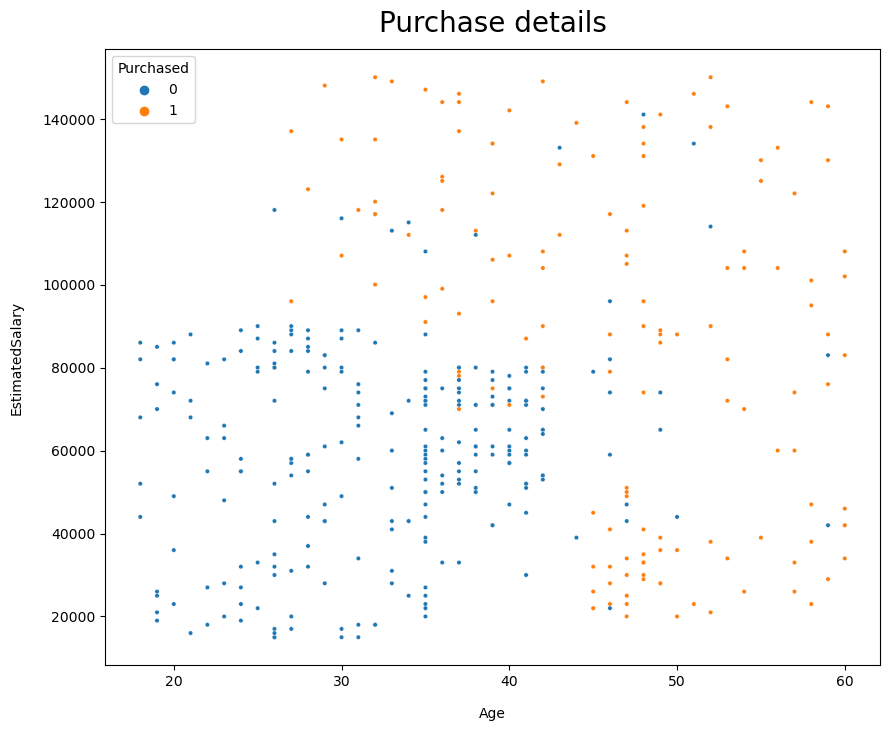

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue="Purchased",data=dataset,s=10)
plt.title("Purchase details",y=1.015, fontsize=20)
plt.xlabel("Age",labelpad=13)

plt.ylabel("EstimatedSalary", labelpad = 13)

ax=plt.gca()

Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split

x=dataset[[ 'Age', 'EstimatedSalary']].values

y=dataset[ 'Purchased'].values

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Step 2 | Logistic Regression Model

The library for this job which is going to be the linear model library and it is called linear
because the logistic regression is a linear classifier which means that here since we're in two
dimensions, our two categories of users are going to be separated by a straight line. Then
import the logistic regression class. Next we will create a new object from this class which is
going to be our classifier that we are going to fit on our training set.


Fitting Logistic Regression to the Training set

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

# Step 3 | Predection

In [21]:
logistic_regression.coef_

array([[-2.90796026e-09, -2.77065628e-06]])

In [22]:
logistic_regression.intercept_

array([-2.30352423e-10])

In [23]:
logistic_regression.predict([[20,30000]])

array([0])

In [38]:
logistic_regression.predict_proba([[20,30000]])

array([[0.52076798, 0.47923202]])

In [39]:
logistic_regression.predict_proba(X_test)

array([[0.51523393, 0.48476607],
       [0.5606543 , 0.4393457 ],
       [0.53043955, 0.46956045],
       [0.56610651, 0.43389349],
       [0.51938489, 0.48061511],
       [0.5428399 , 0.4571601 ],
       [0.57357699, 0.42642301],
       [0.55723911, 0.44276089],
       [0.5517637 , 0.4482363 ],
       [0.5449019 , 0.4550981 ],
       [0.5449019 , 0.4550981 ],
       [0.52353322, 0.47646678],
       [0.53319897, 0.46680103],
       [0.5159259 , 0.4840741 ],
       [0.5599717 , 0.4400283 ],
       [0.57425451, 0.42574549],
       [0.52629699, 0.47370301],
       [0.55107837, 0.44892163],
       [0.52905913, 0.47094087],
       [0.54146444, 0.45853556],
       [0.51869323, 0.48130677],
       [0.55518739, 0.44481261],
       [0.51592592, 0.48407408],
       [0.55244886, 0.44755114],
       [0.51315759, 0.48684241],
       [0.51592592, 0.48407408],
       [0.5551874 , 0.4448126 ],
       [0.5366454 , 0.4633546 ],
       [0.58572786, 0.41427214],
       [0.51454186, 0.48545814],
       [0.

# Step 4 | Evaluating The Predection

We predicted the test results and now we will evaluate if our logistic regression model learned
and understood correctly. So this confusion matrix is going to contain the correct predictions
that our model made on the set as well as the incorrect predictions.

Making the Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 

cm = metrics.confusion_matrix(y_test,y_pred)
cm
tn, fp, fn, tp = cm.ravel()

(tn, fp, fn, tp)

(63, 0, 37, 0)

In [50]:
# Assigning columns names

cm_df = pd.DataFrame(cm,
                     columns = ['Predicted Negative', 'Predicted Positive'],
                                index = ['Actual Negative', 'Actual Positive'])

# Showing the confusion matrix

cm_df

,Predicted Negative,Predicted Positive
Actual Negative,63,0
Actual Positive,37,0


## Accuracy = (TP + TN) / All Predictions

## (Recall) = TP / (FN + TP)

## Precision = TP / (TP + FP)

### F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

Error rate (ERR) is calculated as the number of all incorrect predictions divided by the total
number of the dataset. The best error rate is 0.0, whereas the worst is 1.0. Error rate is
calculated as the total number of two incorrect predictions (FN + FP) divided by the total
number of a dataset (P + N).

In [71]:

p=metrics.precision_score(y_test, y_pred)
r=metrics.recall_score(y_test, y_pred)
a=metrics.accuracy_score(y_test,y_pred)
f=f1_score(y_test, y_pred)
print("precision_score:",p)

print("recall_score:",r)

print("accuracy_score:",a)

print("F1 Score:", f)
# metrics.plot_roc_curve(logistic_regression,X_test,y_test)

precision_score: 0.0
recall_score: 0.0
accuracy_score: 0.63
F1 Score: 0.0


/Users/pratik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        63
           1       0.00      0.00      0.00        37

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/Users/pratik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pratik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 3.722222222222216, 'Actual Label')

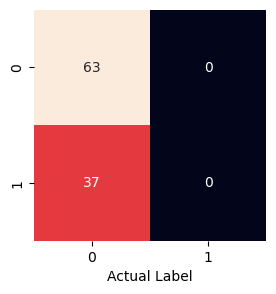

In [73]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel("Actual Label")

Text(0, 0.5, 'Predicted Label')

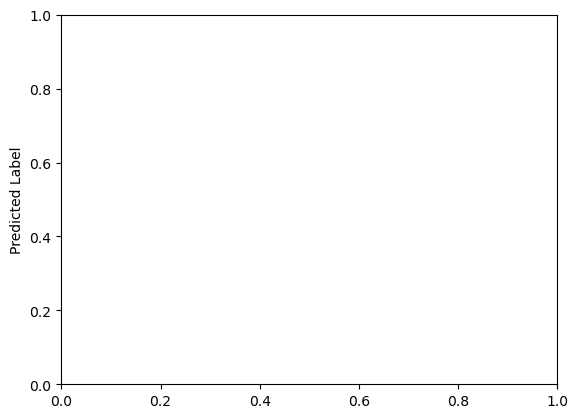

In [75]:
plt.ylabel( "Predicted Label")


In [76]:
err=(fn+fp)/ (tn+fp+fn+tp)
err

0.37

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Separate the features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Compute accuracy, error rate, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print()

# Print the evaluation metrics
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[52  0]
 [28  0]]

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 52
False Negatives (FN): 28
Accuracy: 0.65
Error Rate: 0.35
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/pratik/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
